Example Python code to simulat a simple stochastic SIR model, with exponential wait time.

Parameter: $\beta$ infection rate, $\gamma$ recovery rate

### Simulation function using Gillespie

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def simulate_sir(S0, I0, R0, beta, gamma, t_max):
    """
    Simulates a continuous-time SIR model (Gillespie algorithm).
    Returns a full path history: list of (time, S, I, R).
    """
    N = S0 + I0 + R0
    t = 0.0
    S, I, R = S0, I0, R0
    
    # Store history: (time, S, I, R)
    history = [(t, S, I, R)]
    
    while t < t_max and I > 0:
        # Rates of events
        rate_inf = beta * S * I
        rate_rec = gamma * I
        total_rate = rate_inf + rate_rec
        
        if total_rate == 0:
            break
            
        # Time to next event
        dt = np.random.exponential(1.0 / total_rate)
        
        if t + dt > t_max:
            break
            
        t += dt
        
        # Which event occurred?
        if np.random.rand() < (rate_inf / total_rate):
            # Infection
            S, I, R = S - 1, I + 1, R
        else:
            # Recovery
            S, I, R = S, I - 1, R + 1
            
        history.append((t, S, I, R))
        
    # Add final state up to t_max
    history.append((t_max, S, I, R))
    return history

### Little helper function to plot trajectories

In [2]:
def plot_sir_trajectory(history, title="Stochastic SIR Model"):
    """
    Plot S, I, R trajectories over time from simulation history.
    
    Parameters:
    -----------
    history : list of tuples
        Each tuple is (time, S, I, R)
    title : str
        Title for the plot
    """
    # Extract data
    times = [h[0] for h in history]
    S_vals = [h[1] for h in history]
    I_vals = [h[2] for h in history]
    R_vals = [h[3] for h in history]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.step(times, S_vals, where='post', label='Susceptible (S)', 
             color='#2E86AB', linewidth=2)
    plt.step(times, I_vals, where='post', label='Infected (I)', 
             color='#E63946', linewidth=2)
    plt.step(times, R_vals, where='post', label='Recovered (R)', 
             color='#06A77D', linewidth=2)
    
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Number of Individuals', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

### A running example

Running single SIR simulation...


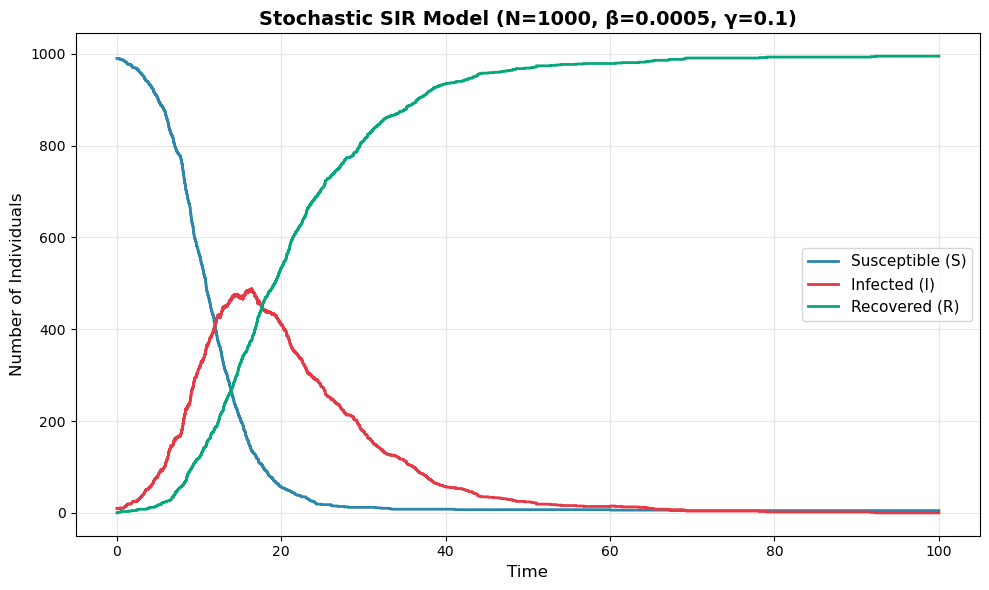


Running multiple simulations...


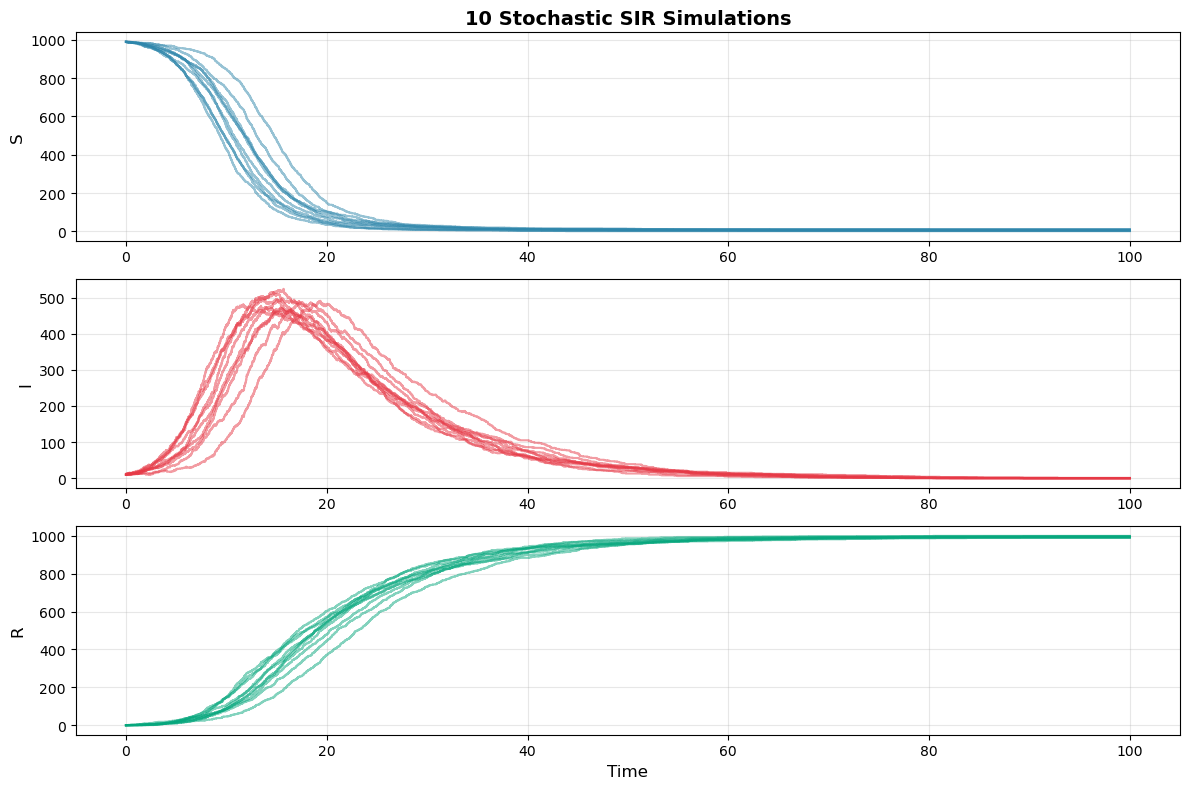


Simulation complete!


In [7]:

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Parameters
    S0 = 990      # Initial susceptible
    I0 = 10       # Initial infected
    R0 = 0        # Initial recovered
    beta = 0.0005 # Infection rate (per contact)
    gamma = 0.1   # Recovery rate
    t_max = 100   # Maximum simulation time
    
    # Run single simulation
    print("Running single SIR simulation...")
    history = simulate_sir(S0, I0, R0, beta, gamma, t_max)
    plot_sir_trajectory(history, 
                       title=f"Stochastic SIR Model (N={S0+I0}, β={beta}, γ={gamma})")
    
    # Run multiple simulations to show stochasticity
    print("\nRunning multiple simulations...")
    plt.figure(figsize=(12, 8))
    
    n_simulations = 10
    for i in range(n_simulations):
        history = simulate_sir(S0, I0, R0, beta, gamma, t_max)
        times = [h[0] for h in history]
        I_vals = [h[2] for h in history]
        
        plt.subplot(3, 1, 1)
        plt.step(times, [h[1] for h in history], where='post', 
                alpha=0.5, color='#2E86AB')
        
        plt.subplot(3, 1, 2)
        plt.step(times, I_vals, where='post', alpha=0.5, color='#E63946')
        
        plt.subplot(3, 1, 3)
        plt.step(times, [h[3] for h in history], where='post', 
                alpha=0.5, color='#06A77D')
    
    plt.subplot(3, 1, 1)
    plt.ylabel('S', fontsize=12)
    plt.title(f'{n_simulations} Stochastic SIR Simulations', 
             fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 1, 2)
    plt.ylabel('I', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.subplot(3, 1, 3)
    plt.ylabel('R', fontsize=12)
    plt.xlabel('Time', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nSimulation complete!")